## Packages

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Resources
General: 
1. Hands on Machine Learning with scikit-learn and tensorflow, chapter 5, 6, 7

2. Machine Learnia : https://www.youtube.com/watch?v=w_bLGK4Pteo

Extra ressources fo algorithms:
- Arbres de décision: 
1. https://scikit-learn.org/stable/modules/tree.html
2. https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/
- Random forest:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
2. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- SVM: 
1. https://scikit-learn.org/stable/modules/svm.html


Courbes d'apprentissage: 
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
2. https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53

Courbes de validation: 
1. https://scikit-learn.org/stable/modules/learning_curve.html

- Take some time to read book sections for decision tree, random forest and SVM algorithms.
- Import these algorithms from scikit-learn and find the hyperparameter options that are available when they are instantiated.


## Decision trees

Explain here how they work in your own words:

In [35]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [37]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [38]:
%pwd

'/home/elie.poncet@Digital-Grenoble.local/Documents/ML3/ML3/ML3.1'

### Visualization: export_graphviz

In [39]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file=("iris_tree.dot"),
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

In [40]:
# open image with PIL
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

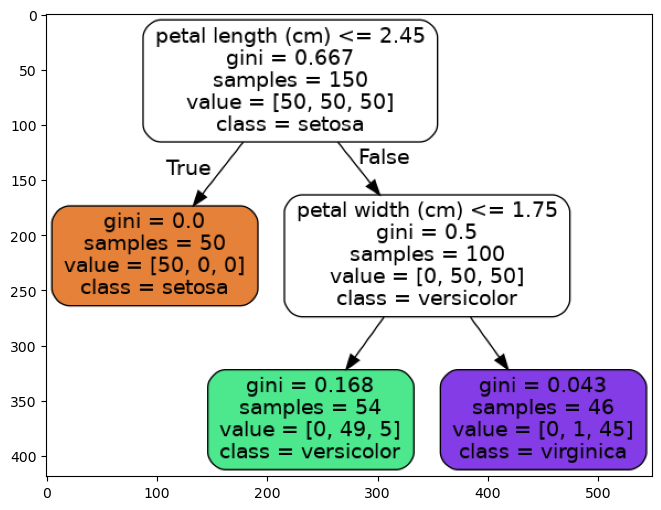

In [31]:
# open image with matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

### Visualization: plot_tree

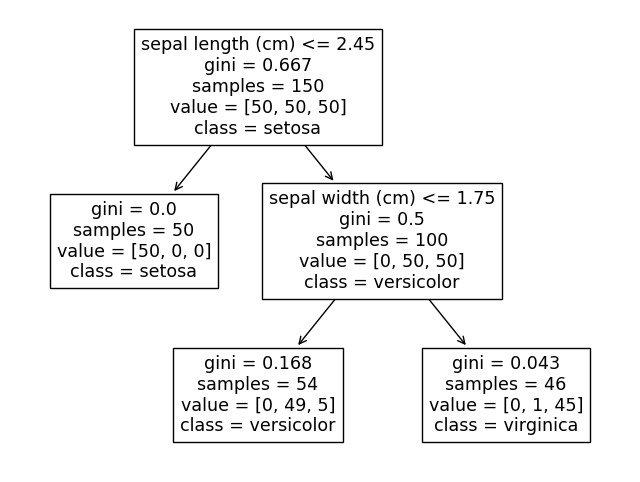

In [43]:
# visualize using the 'plot_tree' method (from the sklearn.tree module)
plot = plot_tree(tree_clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

In [42]:
from sklearn.tree import plot_tree

In [44]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Replace target values with target names
#iris_df['target'] = iris_df['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Print the first five rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [45]:
y= iris_df.pop('target')
X=iris_df

In [46]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

Text(0.5, 1.0, 'Count of each Target Class')

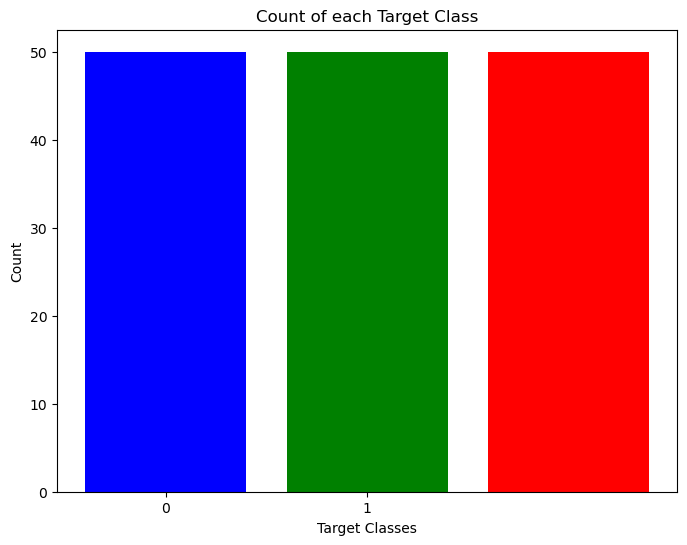

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 8,6
plt.bar(y.unique(), y.value_counts(), color = ['blue', 'green','red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42,max_depth=2)


In [49]:
# fit classifier with max_depth=2
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [53]:
import numpy as np

y_pred = clf.predict(X_test_scaled)



Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9777448559670783


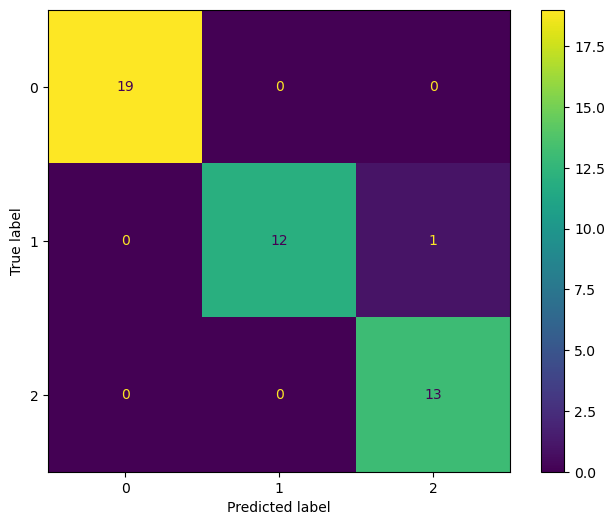

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay                               

acc= accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1-score:', f1)


cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()


## Random forests

Explain here how they work in your own words:

In [55]:
# fit a Random Forest classifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
clf_rf=RandomForestClassifier(random_state=42,max_depth= 2, n_estimators= 20)

In [56]:
# make predictions on the test set
clf_rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [57]:
y_pred=clf_rf.predict(X_test_scaled)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


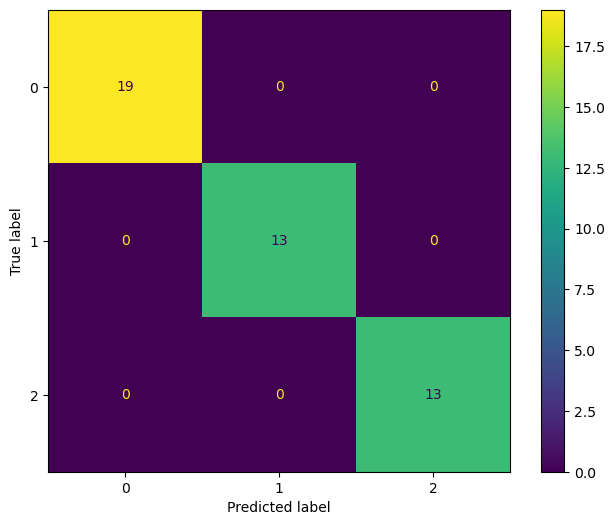

In [58]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay                               

acc= accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1-score:', f1)


cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()

In [ ]:
my_learning_curves_classification(clf_rf,X,y)

## SVM

Explain here how they work in your own words:

In [60]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'linear', random_state = 42)

In [61]:
svm_clf.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [62]:
y_pred=svm_clf.predict(X_test_scaled)


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-score: 0.9777448559670783


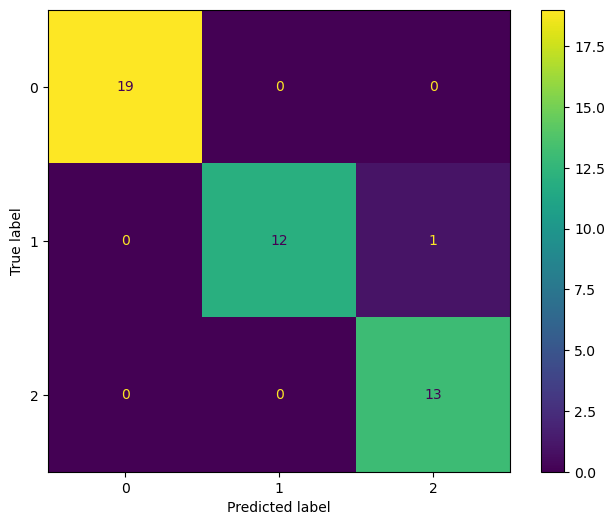

In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay                               

acc= accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)
print('F1-score:', f1)


cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

cm_display.plot()

## Learning curves

### Book example

In [64]:
# Book Dataset
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_


(array([2.14804104]), array([[0.97467856, 0.4380432 ]]))

In [66]:
# Implement the book’s code on learning curves on the data he has used.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_errors, val_errors = [], []
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
 

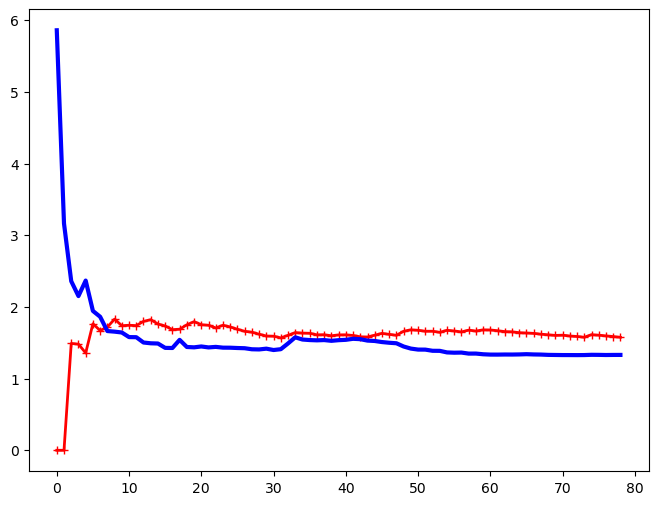

In [67]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Change the method so that instead of having an incremental training set size going from 1 to the size of X_train, you have a fixed set of training sizes.
For example: 

training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')

or 

training_set_sizes = [1, 10, 20, 30, 40, 50, 60, 70, 80]

In [68]:
# Method that plots learning curves for a given estimator and training_set_sizes
def my_learning_curves_regression(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                    test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled=pd.DataFrame(X_train_scaled)
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled = pd.DataFrame(X_test_scaled)
    for m in range(1, len(X_train_scaled)):
        model.fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = model.predict(X_train_scaled[:m])
        y_val_predict = model.predict(X_test_scaled)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  

## Learning curves for classifiers

Implement a ML problem on a dataset you have already seen in the course. 

Produce a plot of a model which shows signs of underfitting, and one that shows signs of overfitting.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

def my_learning_curves_classification(model, X, y, depth=None, estimator=None,degree=None,gamma= None, C=None,kernel='linear', axes=None, ylim=None, cv=None, n_jobs=None):
#choix du model et des hyperparamètres associés    
    if model == 'rf':
        model = RandomForestClassifier(random_state=42, max_depth=depth, n_estimators=estimator)
    elif model == 'dt':
        model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    elif model == 'svm':
        if kernel == 'linear':
            model = SVC(kernel=kernel, C=C, random_state=42)
        elif kernel=='rbf':
            model = SVC(kernel=kernel, C=C,gamma=gamma, random_state=42)
        elif kernel =='poly':
            model = SVC(kernel=kernel, C=C,gamma=gamma,degree=degree, random_state=42)
    
    #y
    y = np.round(y).astype(int)
#train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
#y en, 1d array pour la classification
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
#création liste vide
    train_scores_acc = []
    val_scores_acc = []
    train_scores_f1 = []
    val_scores_f1 = []
#boucle pour progresser dans la taille du train set    
    for m in range(1, len(X_train_scaled)):
        if len(np.unique(y_train[:m])) > 1:
            model.fit(X_train_scaled[:m], y_train[:m])
            y_train_predict = model.predict(X_train_scaled[:m])
            y_test_predict = model.predict(X_test_scaled)
            #"calcul des scores a chaque itération"
            train_scores_acc.append(accuracy_score(y_train[:m], y_train_predict))
            val_scores_acc.append(accuracy_score(y_test, y_test_predict))
            train_scores_f1.append(f1_score(y_train[:m], y_train_predict, average='weighted'))
            val_scores_f1.append(f1_score(y_test, y_test_predict, average='weighted'))
        else:
            train_scores_acc.append(np.nan)
            val_scores_acc.append(np.nan)
            train_scores_f1.append(np.nan)
            val_scores_f1.append(np.nan)
#plot des courbes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(train_scores_acc, "r-+", linewidth=2, label="train")
    ax1.plot(val_scores_acc, "b-", linewidth=3, label="val")
    ax1.legend()
    ax1.grid()
    ax1.set_xlabel("Training set size")
    ax1.set_ylabel("Accuracy")
    ax1.set_title("Accuracy Learning Curves")

    ax2.plot(train_scores_f1, "r-+", linewidth=2, label="train")
    ax2.plot(val_scores_f1, "b-", linewidth=3, label="val")
    ax2.legend()
    ax2.grid()
    ax2.set_xlabel("Training set size")
    ax2.set_ylabel("F1 Score")
    ax2.set_title("F1 Score Learning Curves")

    plt.show()



## Decision trees learning curves

In [70]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

heart_df=pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/data/heart.csv')
heart_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


In [71]:
y= heart_df.pop('target')
X=heart_df

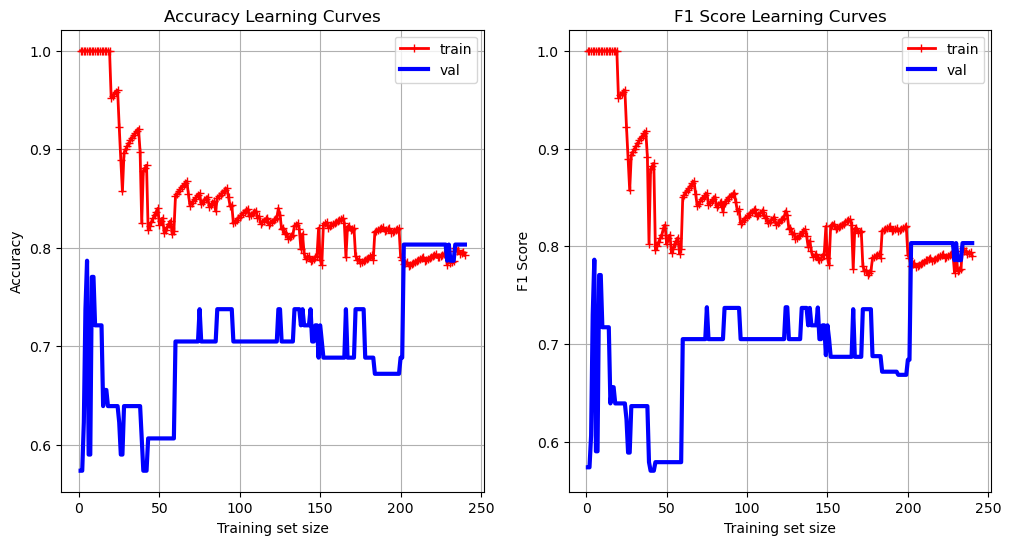

In [74]:
# Underfit model
my_learning_curves_classification('dt', X, y,depth=2)

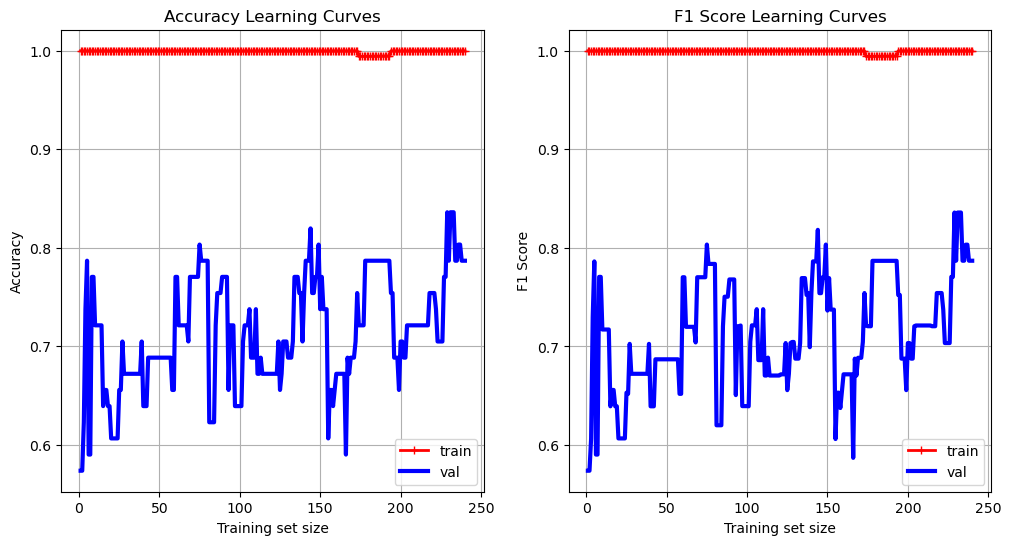

In [75]:
# Overfit model
my_learning_curves_classification('dt', X, y,depth=10)

## Random forests classifier learning curves

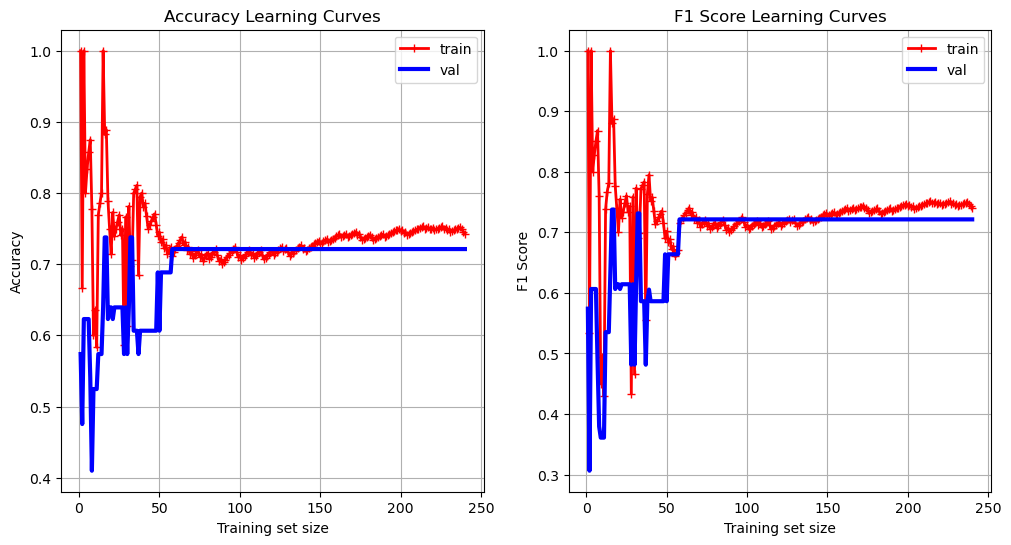

In [181]:
my_learning_curves_classification('rf', X, y,depth=1,estimator=2)

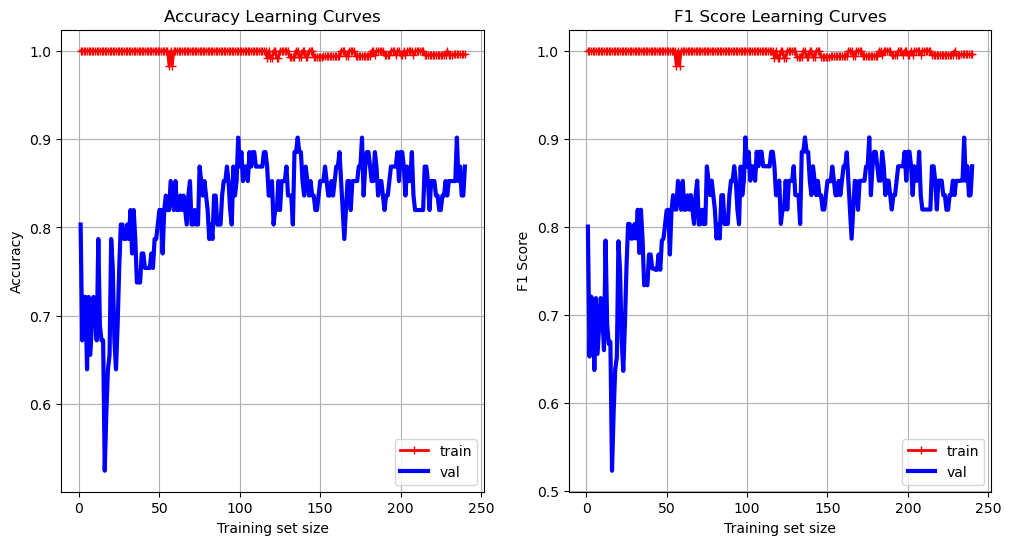

In [79]:
my_learning_curves_classification('rf', X, y,depth=10,estimator=20)

## SVM

In [ ]:
y

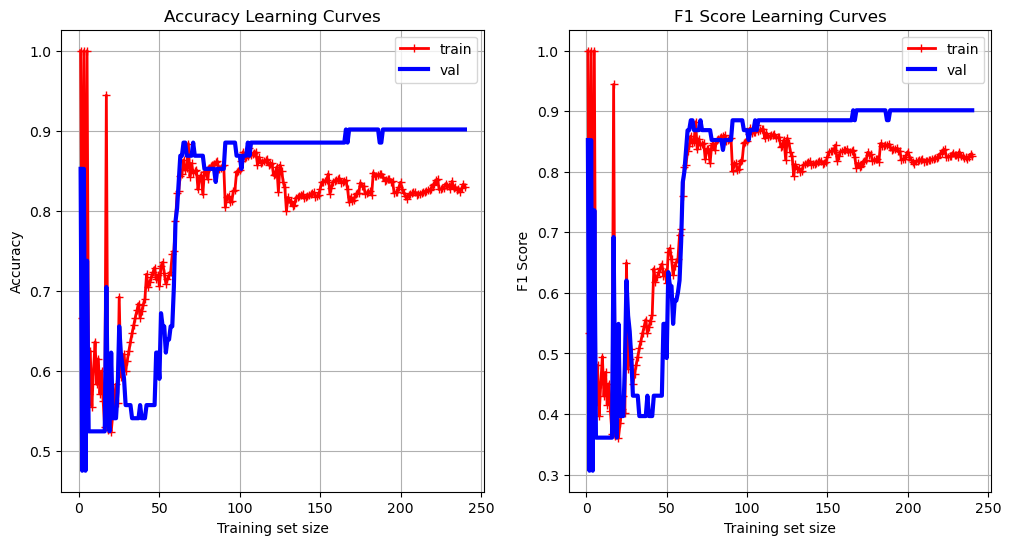

In [80]:
# Underfit model?
my_learning_curves_classification('svm', X, y,C=0.01)

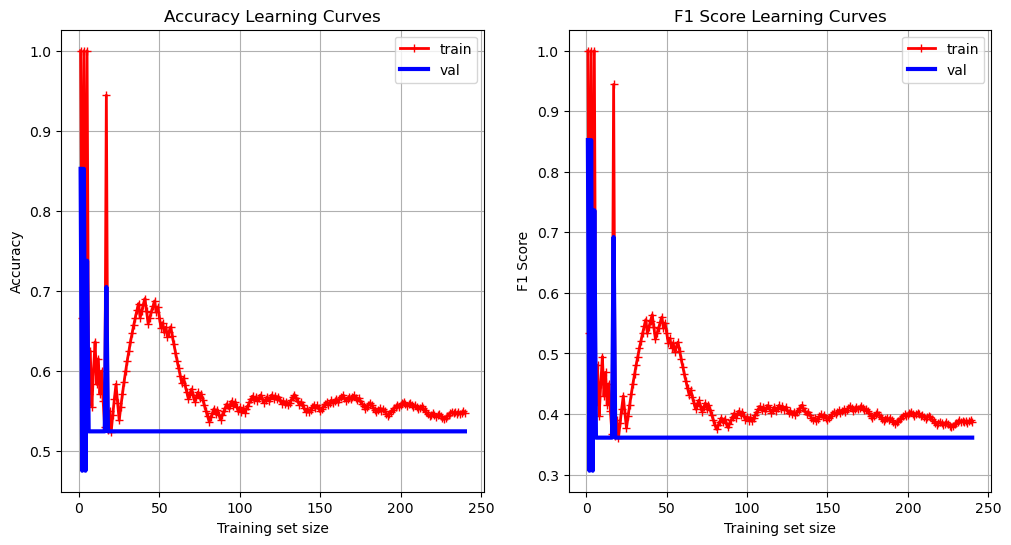

In [183]:
# Overfit model?
my_learning_curves_classification('svm', X, y,C=0.00001)

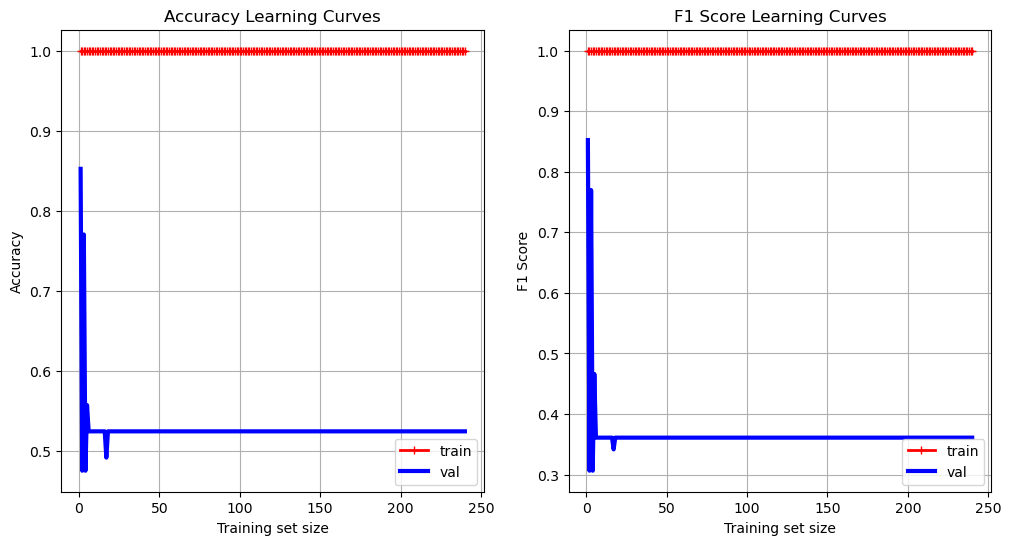

In [84]:
my_learning_curves_classification('svm', X, y,C=100,kernel='rbf',gamma=13)

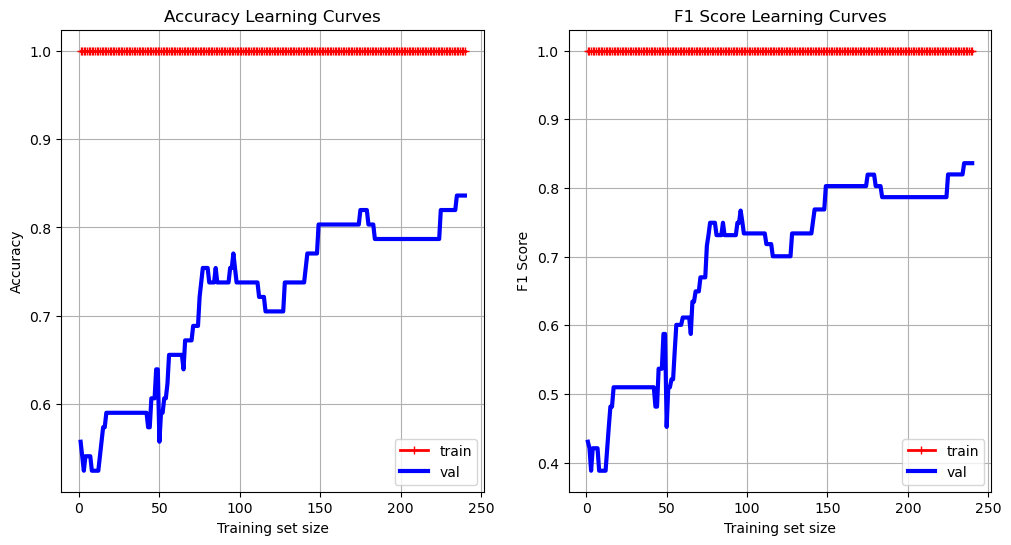

In [184]:
my_learning_curves_classification('svm', X, y,C=100,kernel='poly',degree=5,gamma=13)

https://towardsdatascience.com/a-brief-introduction-to-support-vector-machine-adf0f103a80f


SVM Advantages:

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have good generalization in practice, the risk of over-fitting is less in SVM.

SVM Disadvantages:

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

## Validation curves

Validation curves are a useful tool for improving the performance of a model by addressing issues such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the training and test accuracies as functions of the sample size, we vary the values of the model parameters. They are complementaru of GridSearch and make for a very nice visual tool for ypur algorithm optimization. 


In [119]:
from sklearn.model_selection import validation_curve

def my_validation_curves_classification(model, X, y,scoring="f1", param_name=None, param_range=None, cv=10):
    
    y = np.round(y).astype(int)
#train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
#y en, 1d array pour la classification
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    train_scores, val_scores = validation_curve(
        model, X_train_scaled, y_train, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(8, 6))
    plt.plot(param_range, train_mean, label="Training score", color="darkorange")
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")

    plt.plot(param_range, val_mean, label="Cross-validation score", color="navy")
    plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color="navy")

    #plt.ylim(0, 1) # set y-axis limit to 0 and 1 for accuracy scoring
    plt.legend(loc="best")
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.title(f"Validation Curve ({model.__class__.__name__})")
    plt.ylim([0, 1])
    plt.show()

#     plt.plot(param_range, train_mean, label="Training score", color="darkorange")
#     plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")

#     plt.plot(param_range, val_mean, label="Cross-validation score", color="navy")
#     plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color="navy")

#     plt.legend(loc="best")
#     plt.xlabel(param_name)
#     plt.ylabel(scoring)
#     plt.title(f"Validation Curve ({model.__class__.__name__})")
#     plt.show()

Plot the validation curves for a chosen algorithm and vary 1 or 2 parameters of your choice.

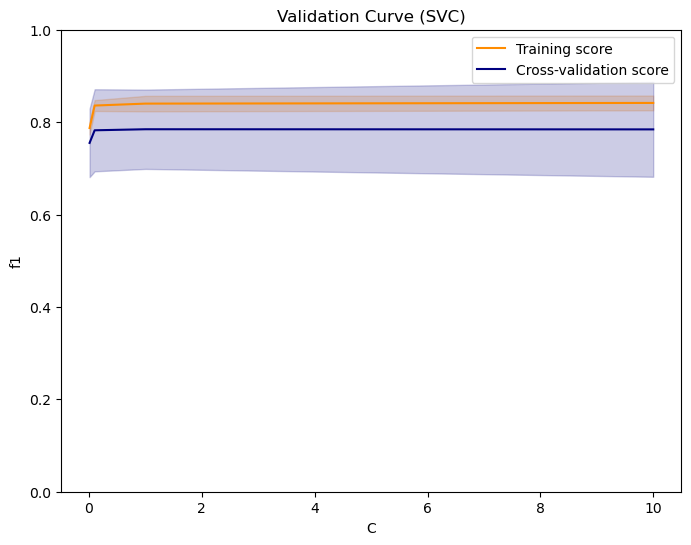

In [163]:
model = SVC(kernel='linear', random_state=42)
my_validation_curves_classification(model, X, y, param_name='C', param_range=[0.01, 0.1, 1, 10])

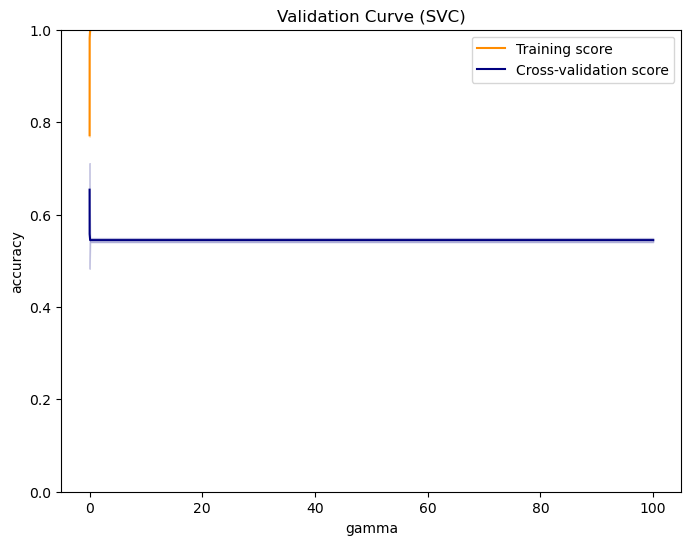

In [87]:
model = SVC(kernel='rbf', random_state=42)
my_validation_curves_classification(model, X, y, param_name='gamma', param_range=[0.001,0.01, 0.1, 1, 10,100])

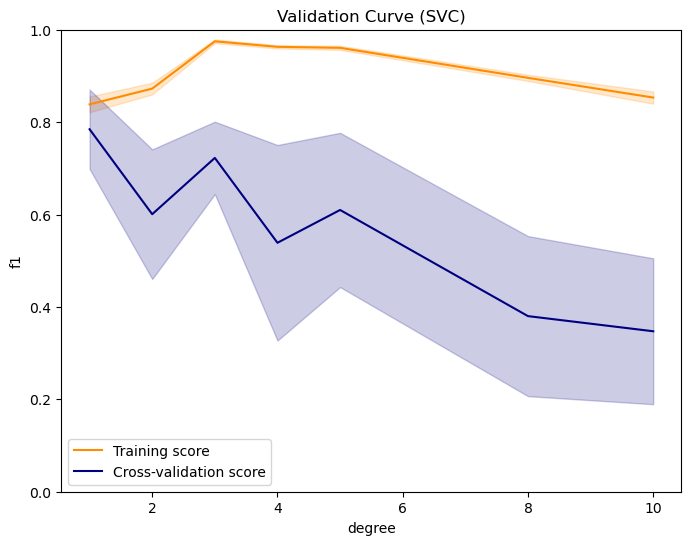

In [165]:
model = SVC(kernel='poly',C=10, random_state=42)
my_validation_curves_classification(model, X, y,scoring='f1', param_name='degree', param_range=[1,2,3,4,5,8,10])

Do a GridSearch and see if the most optimal parameter is coherent with what you see on your validation curves

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#y en, 1d array pour la classification
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [185]:
param_grid = {'degree': [ 1,2,3,4,5,8,10,15,20], 'C' : [1,10]}

In [186]:
model = SVC(kernel='poly', random_state=42)

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=10,
                   scoring='f1')


grid.fit(X_train_scaled, y_train)





GridSearchCV(cv=10, estimator=SVC(kernel='poly', random_state=42),
             param_grid={'C': [1, 10],
                         'degree': [1, 2, 3, 4, 5, 8, 10, 15, 20]},
             scoring='f1')

In [188]:
print(grid.best_score_, grid.best_params_)

0.7845693779904306 {'C': 10, 'degree': 1}


GridSearchCV(cv=10, estimator=SVC(C=1, kernel='poly', random_state=42),
             param_grid={'degree': [2, 4, 5, 8, 10, 15, 20]}, refit='f1',
             return_train_score=True, scoring='f1')

In [180]:
model = SVC(kernel='poly', C=10,degree=3, random_state=42)
model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)
print(f"f1 score on test data: {score:.3f}")

f1 score on test data: 0.975


In [178]:
model = SVC(kernel='poly', **grid.best_params_, random_state=42)
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)
print(f"f1 score on test data: {score:.3f}")

f1 score on test data: 0.885


In [189]:
0.1 +0.2 == 0.3

False